In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt

## RED WINE Random Forest and Random Forest Cross Validation

In [2]:
red_wine = pd.read_csv('data/winequality-red.csv', sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#puts the wine into bins of bad and good. "bad" is quality of 2-6.5 and "good" is quality of 6.5-8
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
red_wine['quality'] = pd.cut(red_wine['quality'], bins = bins, labels = group_names)

In [4]:
#LabelEncoder() will assign binary labels to our quality variable
label_quality = LabelEncoder()

In [5]:
red_wine['quality'] = label_quality.fit_transform(red_wine['quality'])

In [6]:
#shows the number of "good" and "bad" wine
red_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [7]:
X = red_wine.drop('quality', axis = 1)
y = red_wine['quality']

In [8]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
#random forest is used to see if each quality can be predicted to be "good" or "bad" quality and then each quailty puts in a "vote" and that is the over all result
#sample of 200

red_rf = RandomForestClassifier(n_estimators=200)

red_rf.fit(X_train, y_train)

pred_red_rf = red_rf.predict(X_test)

print(classification_report(y_test, pred_red_rf))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.66      0.40      0.50        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.78      0.68      0.72       320
weighted avg       0.87      0.88      0.87       320



In [10]:
#Now lets try to do some evaluation for random forest model using cross validation.
#cross validation is using 1 subset of the data as the validation data.  It got through each subset as the validation data and averages the results.

red_rf_eval = cross_val_score(estimator = red_rf, X = X_train, y = y_train, cv = 10)
red_rf_eval.mean()

0.9093257874015748

In [11]:
red_importances = red_rf.feature_importances_

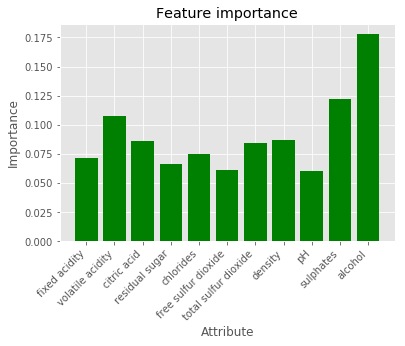

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
importance = red_importances

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, importance, color='green')
plt.xlabel("Attribute")
plt.ylabel("Importance")
plt.title("Feature importance")

plt.xticks(x_pos, x)

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

## WHITE WINE Random Forest and Random Forest Cross Validation

In [13]:
white_wine = pd.read_csv('data/winequality-red.csv', sep=";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
#puts the wine into bins of bad and good. "bad" is quality of 2-6.5 and "good" is quality of 6.5-8
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
white_wine['quality'] = pd.cut(white_wine['quality'], bins = bins, labels = group_names)

In [15]:
#LabelEncoder() will assign binary labels to our quality variable
label_quality = LabelEncoder()

In [16]:
white_wine['quality'] = label_quality.fit_transform(white_wine['quality'])

In [17]:
#shows the number of "good" and "bad" wine
white_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [18]:
X = white_wine.drop('quality', axis = 1)
y = white_wine['quality']

In [19]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
#random forest is used to see if each quality can be predicted to be "good" or "bad" quality and then each quailty puts in a "vote" and that is the over all result
#sample of 200

white_rf = RandomForestClassifier(n_estimators=200)

white_rf.fit(X_train, y_train)

pred_white_rf = white_rf.predict(X_test)

print(classification_report(y_test, pred_white_rf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.70      0.40      0.51        47

   micro avg       0.89      0.89      0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320



In [21]:
#Now lets try to do some evaluation for random forest model using cross validation.
#cross validation is using 1 subset of the data as the validation data.  It got through each subset as the validation data and averages the results.

white_rf_eval = cross_val_score(estimator = white_rf, X = X_train, y = y_train, cv = 10)
white_rf_eval.mean()

0.910894438976378

In [22]:
white_importances = white_rf.feature_importances_

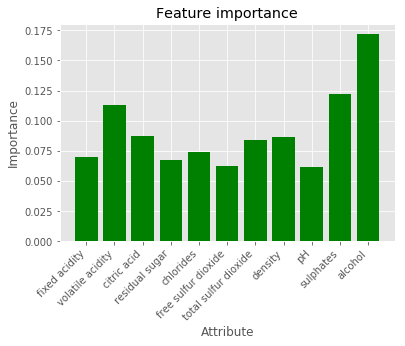

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
importance = white_importances

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, importance, color='green')
plt.xlabel("Attribute")
plt.ylabel("Importance")
plt.title("Feature importance")

plt.xticks(x_pos, x)

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()